In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
batch=unpickle(f'data_batch_1')
x_train=np.array(batch[b'data'])
y_train=np.array(batch[b'labels'])
for i in range(2,5):
    batch=unpickle(f'data_batch_{i}')
    x_train=np.append(x_train,batch[b'data'],axis=0)
    y_train=np.append(y_train,batch[b'labels'])
x_train=x_train.astype('float32')
# x_train=(x_train.reshape((40000,3,32,32))).transpose((0,2,3,1)).astype('float32')

batch=unpickle('data_batch_5')
x_val=batch[b'data'].astype('float32')
y_val=np.array(batch[b'labels'])

batch=unpickle('test_batch')
x_test=batch[b'data'].astype('float32')
y_test=np.array(batch[b'labels'])


In [44]:
# num_classes = 10

# y_train=to_categorical(y_train,num_classes)
# y_val=to_categorical(y_val,num_classes)
# y_test=to_categorical(y_test,num_classes)

names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
names=dict((i,j) for i,j in enumerate(names))

m=np.mean(x_train,axis=0)
s=np.std(x_train,axis=0)

In [45]:
def normalization(x):
    return (x-m)/s

In [46]:
x_train=normalization(x_train)

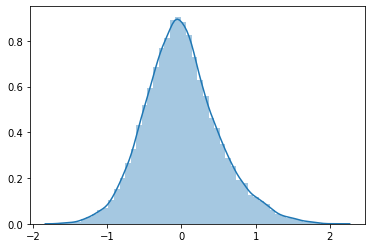

In [47]:
sns.distplot(x_train.mean(axis=1))

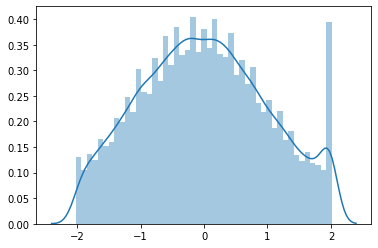

In [48]:
sns.distplot(x_train[:,1000])

In [53]:

model=GaussianNB()
model.fit(x_train,y_train)



GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
model.score(x_train,y_train)

0.285525

In [55]:
# x_val=normalization(x_val)
model.score(x_val,y_val)

0.288

In [57]:
model.score(x_test,y_test)

0.2971

In [3]:
from sklearn.decomposition import PCA

pca=PCA()

x=pca.fit_transform(x_train)
x_v=pca.transform(x_val)
x_t=pca.transform(x_test)

In [71]:
pca_val_score=[]
for i in range(1,100):
    pca_model=GaussianNB()
    pca_model.fit(x[:,:i],y_train)
    pca_val_score.append(pca_model.score(x_v[:,:i],y_val))

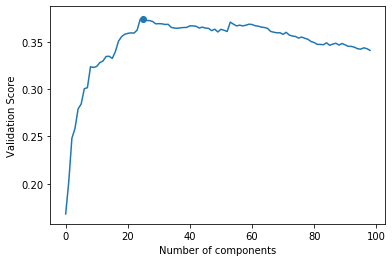

Number of components: 25 Best score on validation: 0.3741


In [78]:
plt.plot(pca_val_score)
plt.scatter(np.argmax(pca_val_score),max(pca_val_score))
plt.xlabel('Number of components')
plt.ylabel('Validation Score')
plt.show()
print('Number of components:',np.argmax(pca_val_score),'Best score on validation:',max(pca_val_score) )

In [14]:
pca_model=GaussianNB()
pca_model.fit(x[:,:25],y_train)
print(pca_model.score(x_t[:,:25],y_test))

from sklearn.metrics import confusion_matrix
pred_test=pca_model.predict(x_t[:,:25])
conf=confusion_matrix(y_test,pred_test)
print(conf)
print(conf/conf.sum(axis=1))

0.3709
[[459  40  47  42  73  20  64  37 160  58]
 [ 60 352  26  57  41  48  83  40 101 192]
 [ 99  42 122  90 250  56 215  63  27  36]
 [ 54  47  67 255  88 133 187  68  36  65]
 [ 48  21  63  50 422  28 238  79  29  22]
 [ 40  24  74 173  87 288 150  86  31  47]
 [ 21  38  50  46 150  42 565  38  10  40]
 [ 50  43  43  80 161  62  97 306  52 106]
 [150  67  16  32  44  34  52  41 482  82]
 [ 66 132  11  45  40  19  71  55 103 458]]
[[0.459 0.04  0.047 0.042 0.073 0.02  0.064 0.037 0.16  0.058]
 [0.06  0.352 0.026 0.057 0.041 0.048 0.083 0.04  0.101 0.192]
 [0.099 0.042 0.122 0.09  0.25  0.056 0.215 0.063 0.027 0.036]
 [0.054 0.047 0.067 0.255 0.088 0.133 0.187 0.068 0.036 0.065]
 [0.048 0.021 0.063 0.05  0.422 0.028 0.238 0.079 0.029 0.022]
 [0.04  0.024 0.074 0.173 0.087 0.288 0.15  0.086 0.031 0.047]
 [0.021 0.038 0.05  0.046 0.15  0.042 0.565 0.038 0.01  0.04 ]
 [0.05  0.043 0.043 0.08  0.161 0.062 0.097 0.306 0.052 0.106]
 [0.15  0.067 0.016 0.032 0.044 0.034 0.052 0.041 0.482 0.

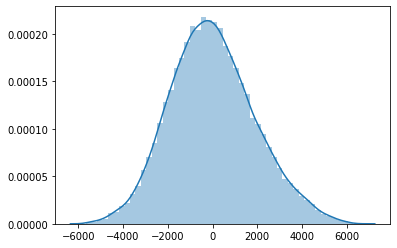

In [82]:
sns.distplot(x[:,0])

In [4]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

svc_val=[]
for i in range(1,200):
    pca_svc=SGDClassifier(n_jobs=-1)
    pca_svc.fit(x[:,:i],y_train)
    if i%10==0:print(i)
    svc_val.append(pca_svc.score(x_v[:,:i],y_val))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


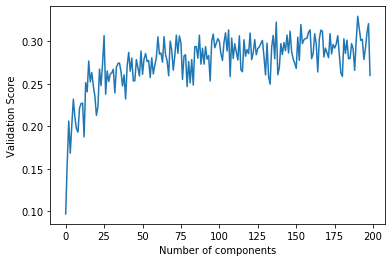

Number of components: 190 Best score on validation: 0.3295


In [5]:
plt.plot(svc_val)
plt.xlabel('Number of components')
plt.ylabel('Validation Score')
plt.show()
print('Number of components:',np.argmax(svc_val),'Best score on validation:',max(svc_val) )

In [6]:
pca_svc=SGDClassifier(n_jobs=-1)
pca_svc.fit(x[:,:190],y_train)
print(pca_svc.score(x_t[:,:190],y_test))

0.2997


In [ ]:
svc=SGDClassifier(n_jobs=-1)
svc.fit(x_train,y_train)

print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))
